## Eleições 2022 - Mapa

#### Notebook para analisar rapidamente os dados disponibilizados pelo TSE das eleições de 2022

Portal de Dados Abertos do TSE: https://dadosabertos.tse.jus.br/

In [1]:
# rodar para deixar as células da largura da janela do navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs


# precisa ter mapclassify instalado para mapas cloropléticos

sep = ';' # separador do arquivo CSV
dec = ',' # separador de decimais
enc = 'latin1' # codificação dos caracteres

In [3]:
# arquivos CSV
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'

### Votos por Seção - Primeiro Turno

In [7]:
# dataframe 
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'
df_secao = pd.read_csv(f_vot_secao, sep=sep, encoding=enc, decimal=dec)
df_secao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [8]:
df_secao['NM_VOTAVEL'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JOSE MARIA EYMAEL',
       'LUIZ FELIPE CHAVES D AVILA', 'KELMON LUIS DA SILVA SOUZA',
       'VOTO BRANCO', 'SORAYA VIEIRA THRONICKE', 'CIRO FERREIRA GOMES',
       'SOFIA PADUA MANZANO', 'JAIR MESSIAS BOLSONARO',
       'SIMONE NASSAR TEBET', 'LEONARDO PÉRICLES VIEIRA ROQUE',
       'VOTO NULO', 'VERA LUCIA PEREIRA DA SILVA SALGADO'], dtype=object)

In [37]:
df_secao

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,157,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,138,1015,280001607829,CENTRO ADMINISTRATIVO FABIANO MELO (ANTIGA FAC...,"AV. GOIÁS, 556"
1,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,500,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,173,2526,280001607829,UNIÃO GAÚCHA J. SIMÕES LOPES NETO,"AV. ENGENHEIRO ILDEFONSO SIMÕES LOPES, 531"
2,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,221,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,129,1180,280001607829,UTRAMIG,"AVENIDA AFONSO PENA, 3400"
3,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,92,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,138,1023,280001607829,ESCOLA ESTADUAL GUIMARAES ROSA,"RUA ELIEZER PENA, 177"
4,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,300,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,141,1139,280001607829,COLÉGIO ESTADUAL RUBENS FARRULA,"AV. PLACIDO FIGUEIREDO JUNIOR, S/N"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380731,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,220,1,PRESIDENTE,44,SORAYA VIEIRA THRONICKE,1,1457,280001644128,COLÉGIO PINHEIRO GUIMARÃES,RUA SILVEIRA MARTINS 151
5380732,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,44,1,PRESIDENTE,44,SORAYA VIEIRA THRONICKE,3,1040,280001644128,EE PROF. RUI PRADO DE MENDONCA FILHO,"R PERU, 781"
5380733,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,469,1,PRESIDENTE,44,SORAYA VIEIRA THRONICKE,2,1678,280001644128,ESCOLA PROFª MARIA CARMELITA CARDOSO GAMA (CAI...,"CAMPUS A.C.SIMOES, BR 104, KM 14, CIDADE UNIVE..."
5380734,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,13,1,PRESIDENTE,44,SORAYA VIEIRA THRONICKE,3,1023,280001644128,E.M. CEL. CONRADO CALDEIRA,"PRAÇA ABILIO MANOEL, 135"


### Pivot table

In [28]:
df_secao_1t = df_secao.query('NR_TURNO == 1')
df_pvt_1t = pd.pivot_table(df_secao_1t, index='NM_MUNICIPIO', values='QT_VOTOS', columns='NM_VOTAVEL', aggfunc=np.sum, fill_value=0).reset_index()


In [10]:
df_pvt_1t

NM_VOTAVEL,NM_MUNICIPIO,CIRO FERREIRA GOMES,JAIR MESSIAS BOLSONARO,JOSE MARIA EYMAEL,KELMON LUIS DA SILVA SOUZA,LEONARDO PÉRICLES VIEIRA ROQUE,LUIZ FELIPE CHAVES D AVILA,LUIZ INÁCIO LULA DA SILVA,SIMONE NASSAR TEBET,SOFIA PADUA MANZANO,SORAYA VIEIRA THRONICKE,VERA LUCIA PEREIRA DA SILVA SALGADO,VOTO BRANCO,VOTO NULO
0,ABADIA DE GOIÁS,198,4710,1,3,1,10,3649,355,1,82,1,97,150
1,ABADIA DOS DOURADOS,89,1869,1,2,0,41,2228,136,1,11,0,72,156
2,ABADIÂNIA,122,5192,1,1,1,10,2594,390,1,68,0,118,174
3,ABAETETUBA,1746,22267,7,36,7,67,70766,3081,9,301,12,605,1111
4,ABAETÉ,278,6504,0,8,4,101,6119,517,4,42,3,274,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,ÁUREA,45,1485,0,0,1,10,1014,114,0,13,0,75,45
5423,ÂNGULO,23,1294,0,1,0,1,713,100,0,12,1,30,54
5424,ÉRICO CARDOSO,136,1029,0,6,2,5,4619,89,0,54,2,96,354
5425,ÓBIDOS,488,7800,3,10,5,15,19762,1131,1,95,2,214,356


In [21]:
# exportar para CSV
# df_pvt_1t.to_csv('votacao_municipio_1turno.csv')

In [12]:
# segundo turno
df_secao_2t = df_secao.query('NR_TURNO == 2')
df_pvt_2t = pd.pivot_table(df_secao_2t, index='NM_MUNICIPIO', values='QT_VOTOS', columns='NM_VOTAVEL', aggfunc=np.sum, fill_value=0).reset_index()
# df_pvt_2t.to_csv('votacao_municipio_2turno.csv')

### Geopackage

In [4]:
gdf_mun250 = None

In [5]:
gpkg_mun = './Brasil_Cartografia/mun250.gpkg'
gdf_mun250 = gpd.read_file(gpkg_mun)
gdf_mun250

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry
0,1,Acajutiba,Não,2900306,None,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087..."
1,2,Aporá,Não,2901908,None,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440..."
2,3,Campestre do Maranhão,Não,2102556,None,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ..."
3,4,Porto Murtinho,Não,5006903,None,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243..."
4,5,Pimenteiras do Oeste,Não,1101468,None,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808..."
...,...,...,...,...,...,...
5565,5568,Ibitirama,Não,3202553,None,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749..."
5566,5569,Marataízes,Não,3203320,None,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658..."
5567,5570,Buriti dos Lopes,Não,2202000,None,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ..."
5568,5620,Vitória,Não,3205309,None,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958..."


<AxesSubplot: >

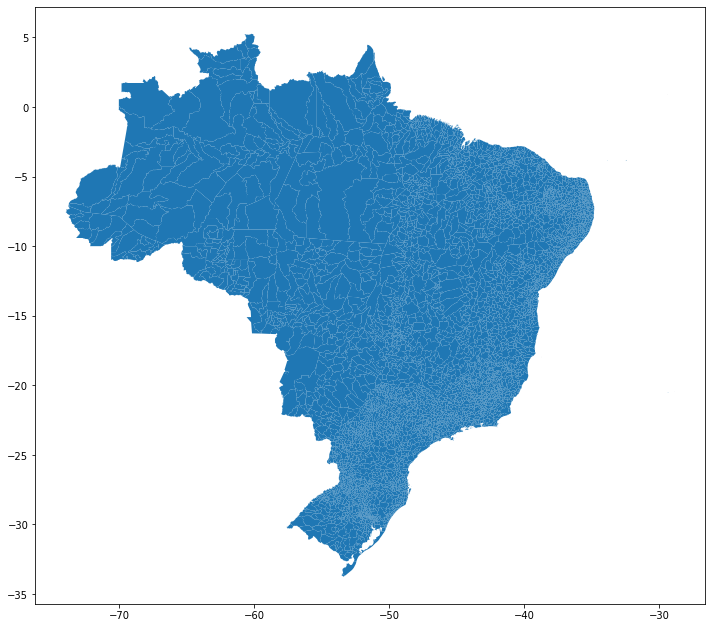

In [13]:
gdf_mun250.plot(figsize=(12,12))

In [14]:
# renomear coluna para join
df_pvt_1t = df_pvt_1t.rename(columns={"NM_MUNICIPIO": "nome"})
df_pvt_2t = df_pvt_2t.rename(columns={"NM_MUNICIPIO": "nome"})

In [15]:
df_pvt_1t

NM_VOTAVEL,nome,CIRO FERREIRA GOMES,JAIR MESSIAS BOLSONARO,JOSE MARIA EYMAEL,KELMON LUIS DA SILVA SOUZA,LEONARDO PÉRICLES VIEIRA ROQUE,LUIZ FELIPE CHAVES D AVILA,LUIZ INÁCIO LULA DA SILVA,SIMONE NASSAR TEBET,SOFIA PADUA MANZANO,SORAYA VIEIRA THRONICKE,VERA LUCIA PEREIRA DA SILVA SALGADO,VOTO BRANCO,VOTO NULO
0,ABADIA DE GOIÁS,198,4710,1,3,1,10,3649,355,1,82,1,97,150
1,ABADIA DOS DOURADOS,89,1869,1,2,0,41,2228,136,1,11,0,72,156
2,ABADIÂNIA,122,5192,1,1,1,10,2594,390,1,68,0,118,174
3,ABAETETUBA,1746,22267,7,36,7,67,70766,3081,9,301,12,605,1111
4,ABAETÉ,278,6504,0,8,4,101,6119,517,4,42,3,274,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,ÁUREA,45,1485,0,0,1,10,1014,114,0,13,0,75,45
5423,ÂNGULO,23,1294,0,1,0,1,713,100,0,12,1,30,54
5424,ÉRICO CARDOSO,136,1029,0,6,2,5,4619,89,0,54,2,96,354
5425,ÓBIDOS,488,7800,3,10,5,15,19762,1131,1,95,2,214,356


In [16]:
gdf_mun250['nome'] = gdf_mun250['nome'].str.upper()

In [17]:
gdf_mun250

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry
0,1,ACAJUTIBA,Não,2900306,None,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087..."
1,2,APORÁ,Não,2901908,None,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440..."
2,3,CAMPESTRE DO MARANHÃO,Não,2102556,None,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ..."
3,4,PORTO MURTINHO,Não,5006903,None,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243..."
4,5,PIMENTEIRAS DO OESTE,Não,1101468,None,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808..."
...,...,...,...,...,...,...
5565,5568,IBITIRAMA,Não,3202553,None,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749..."
5566,5569,MARATAÍZES,Não,3203320,None,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658..."
5567,5570,BURITI DOS LOPES,Não,2202000,None,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ..."
5568,5620,VITÓRIA,Não,3205309,None,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958..."


In [18]:
gdf_mun250_1t = gdf_mun250.merge(df_pvt_1t, on='nome')

In [19]:
gdf_mun250_1t

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry,CIRO FERREIRA GOMES,JAIR MESSIAS BOLSONARO,JOSE MARIA EYMAEL,KELMON LUIS DA SILVA SOUZA,LEONARDO PÉRICLES VIEIRA ROQUE,LUIZ FELIPE CHAVES D AVILA,LUIZ INÁCIO LULA DA SILVA,SIMONE NASSAR TEBET,SOFIA PADUA MANZANO,SORAYA VIEIRA THRONICKE,VERA LUCIA PEREIRA DA SILVA SALGADO,VOTO BRANCO,VOTO NULO
0,1,ACAJUTIBA,Não,2900306,None,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087...",167,1548,0,38,1,6,6794,156,0,80,1,109,322
1,2,APORÁ,Não,2901908,None,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440...",249,1710,0,12,1,2,7625,235,1,105,1,135,413
2,3,CAMPESTRE DO MARANHÃO,Não,2102556,None,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ...",153,2023,0,9,0,5,4984,100,0,7,1,60,110
3,4,PORTO MURTINHO,Não,5006903,None,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243...",52,2697,0,3,0,0,2596,139,0,8,0,42,84
4,5,PIMENTEIRAS DO OESTE,Não,1101468,None,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808...",16,902,0,2,1,0,502,54,0,6,0,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,5568,IBITIRAMA,Não,3202553,None,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749...",170,3396,1,2,1,3,1757,161,1,26,1,77,142
5500,5569,MARATAÍZES,Não,3203320,None,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658...",466,15079,2,8,9,41,7355,604,4,63,4,343,398
5501,5570,BURITI DOS LOPES,Não,2202000,None,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ...",291,3089,0,10,1,5,9592,162,2,77,2,84,313
5502,5620,VITÓRIA,Não,3205309,None,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958...",7222,102641,31,138,97,1725,89301,10800,131,887,53,3092,4188


In [20]:
gdf_mun250_1t.columns    

Index(['id', 'nome', 'geometriaaproximada', 'geocodigo', 'anodereferencia',
       'geometry', 'CIRO FERREIRA GOMES', 'JAIR MESSIAS BOLSONARO',
       'JOSE MARIA EYMAEL', 'KELMON LUIS DA SILVA SOUZA',
       'LEONARDO PÉRICLES VIEIRA ROQUE', 'LUIZ FELIPE CHAVES D AVILA',
       'LUIZ INÁCIO LULA DA SILVA', 'SIMONE NASSAR TEBET',
       'SOFIA PADUA MANZANO', 'SORAYA VIEIRA THRONICKE',
       'VERA LUCIA PEREIRA DA SILVA SALGADO', 'VOTO BRANCO', 'VOTO NULO'],
      dtype='object')

In [21]:
# nomes dos candidatos
cfg = 'CIRO FERREIRA GOMES'
jmb = 'JAIR MESSIAS BOLSONARO'
jme = 'JOSE MARIA EYMAEL'
pkl = 'KELMON LUIS DA SILVA SOUZA'
lpr = 'LEONARDO PÉRICLES VIEIRA ROQUE'
lfd = 'LUIZ FELIPE CHAVES D AVILA'
lil = 'LUIZ INÁCIO LULA DA SILVA'
snt = 'SIMONE NASSAR TEBET'
spm = 'SOFIA PADUA MANZANO'
svt = 'SORAYA VIEIRA THRONICKE'
vls = 'VERA LUCIA PEREIRA DA SILVA SALGADO'
vb = 'VOTO BRANCO'
vn = 'VOTO NULO'

### Plot

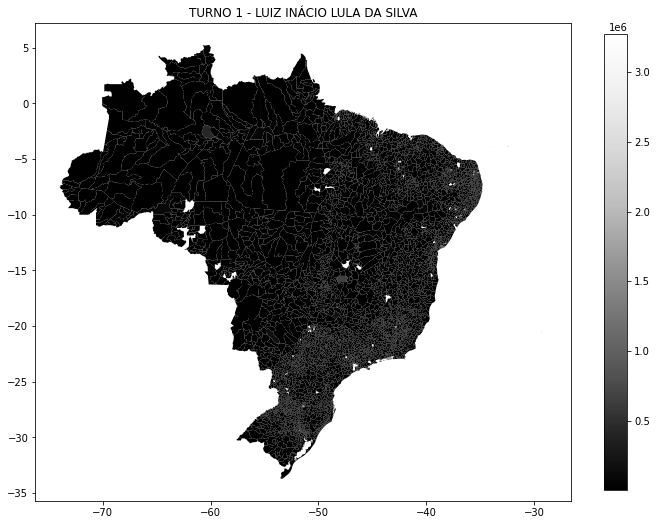

In [39]:
candidat = lil
ax = gdf_mun250_1t.plot(candidat, legend=True, figsize=(12,12), cmap='Greys_r', legend_kwds={'shrink':0.7})
ax.set_title(f'TURNO 1 - {candidat}');

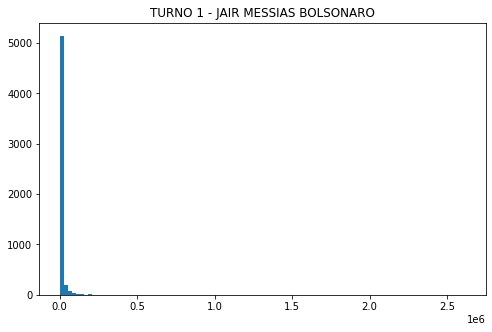

In [180]:
candidat = jmb
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gdf_mun250_1t[candidat], bins=100);
ax.set_title(f'TURNO 1 - {candidat}');

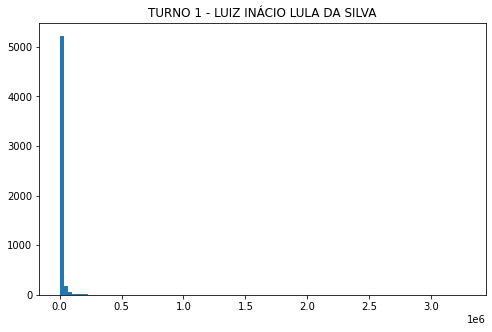

In [181]:
candidat = lil
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gdf_mun250_1t[candidat], bins=100);
ax.set_title(f'TURNO 1 - {candidat}');

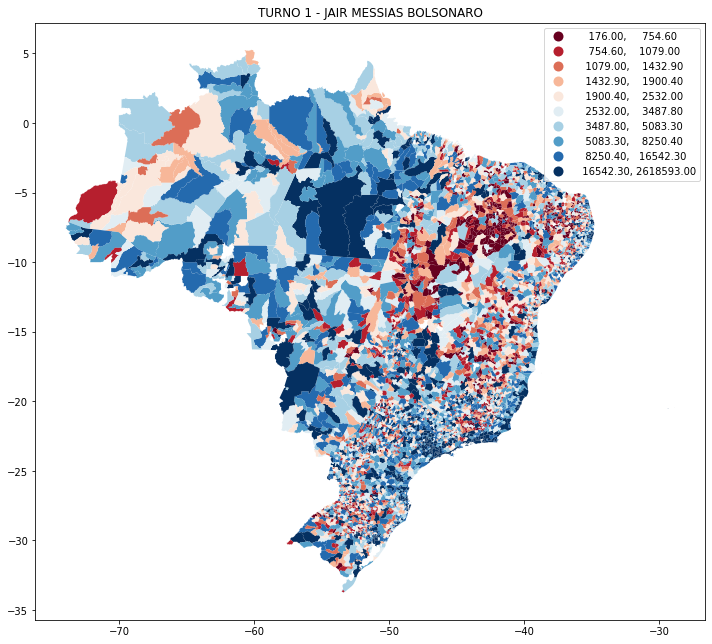

In [185]:
candidat = jmb
ax = gdf_mun250_1t.plot(candidat, legend=True, figsize=(12,12), cmap='RdBu', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 1 - {candidat}');

In [ ]:
# mapclassify schemes

# 'BoxPlot'
# 'EqualInterval'
# 'FisherJenks'
# 'FisherJenksSampled'
# 'HeadTailBreaks'
# 'JenksCaspall'
# 'JenksCaspallForced'
# 'JenksCaspallSampled'
# 'MaxP'
# 'MaximumBreaks'
# 'NaturalBreaks'
# 'Quantiles'
# 'Percentiles'
# 'StdMean'
# 'UserDefined'

#################################################################################

# colormaps
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
# supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
# 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
# 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG',
# 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
# 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
# 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
# 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary',
# 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
# 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
# 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
# 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
# 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
# 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
# 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
# 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
# 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'


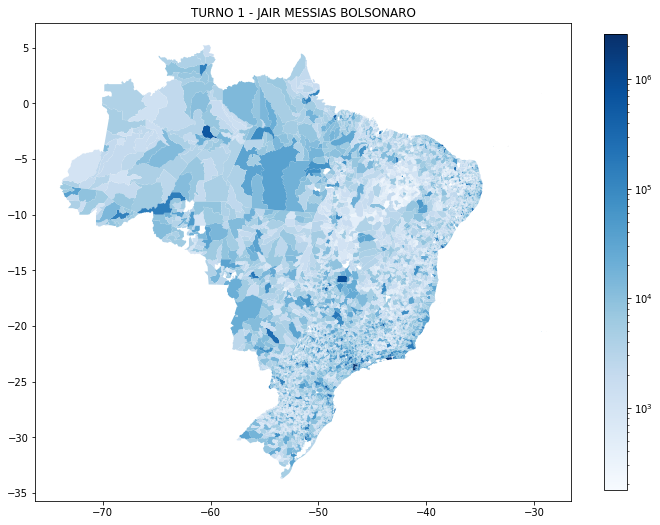

In [167]:
# normalizar coluna de valores para log
candidat = jmb
norm = clrs.LogNorm(vmin=gdf_mun250_1t[candidat].min(), vmax=gdf_mun250_1t[candidat].max())
ax = gdf_mun250_1t.plot(candidat, legend=True, figsize=(12,12), cmap='Blues', norm=norm, legend_kwds={'shrink':0.7})
ax.set_title(f'TURNO 1 - {candidat1}');

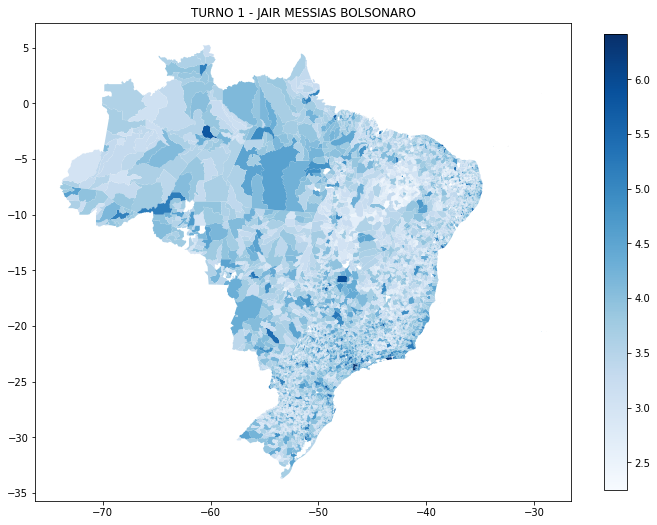

In [168]:
# criar coluna com valores log
gdf_mun250_1t[f'log_{candidat}'] = np.log10(gdf_mun250_1t[candidat]) 
ax = gdf_mun250_1t.plot(column=f'log_{candidat}', legend=True, figsize=(12,12), cmap='Blues', legend_kwds={'shrink':0.7})
ax.set_title(f'TURNO 1 - {candidat1}');

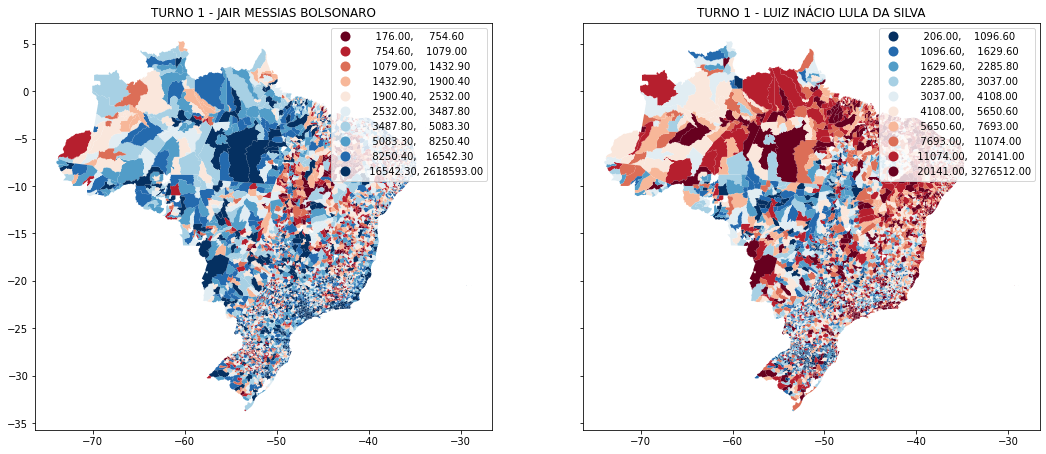

In [188]:
# dois mapas

gdf = gdf_mun250_1t
candidat1 = jmb
candidat2 = lil

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
gdf.plot(ax=ax, column=candidat1, legend=True, cmap='RdBu', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 1 - {candidat1}');

ax = axs[1]
gdf.plot(ax=ax, column=candidat2, legend=True, cmap='RdBu_r', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 1 - {candidat2}');


### Analise apenas JMB e LILS

In [22]:
gdf = gdf_mun250_1t
candidat1 = jmb
candidat2 = lil

gdf['soma_cands'] = gdf[candidat1] + gdf[candidat2]
gdf[f'perc_{candidat1}'] = (gdf[candidat1]*100) / gdf['soma_cands']
gdf[f'perc_{candidat2}'] = (gdf[candidat2]*100) / gdf['soma_cands']

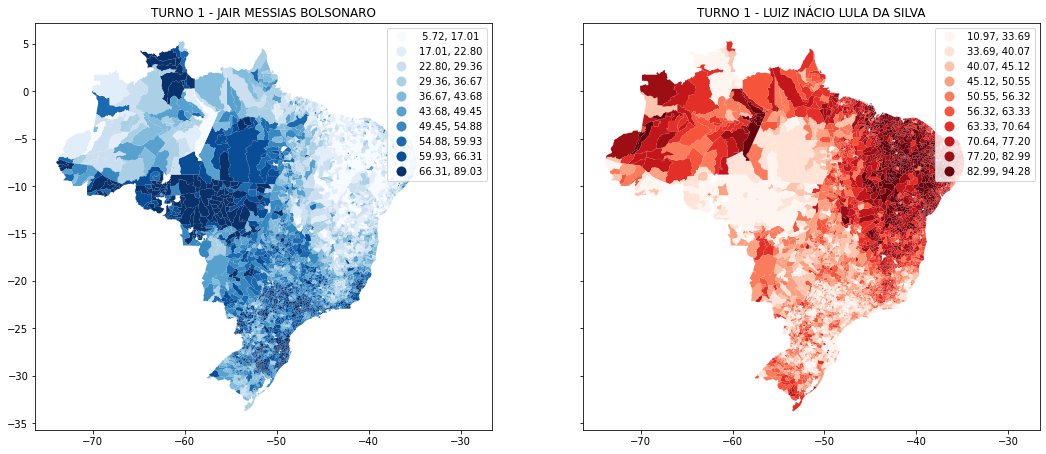

In [23]:
# dois mapas - porcentual

gdf = gdf_mun250_1t
candidat1 = jmb
candidat2 = lil

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
gdf.plot(ax=ax, column=gdf[f'perc_{candidat1}'], legend=True, cmap='Blues', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 1 - {candidat1}');

ax = axs[1]
gdf.plot(ax=ax, column=gdf[f'perc_{candidat2}'], legend=True, cmap='Reds', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 1 - {candidat2}');


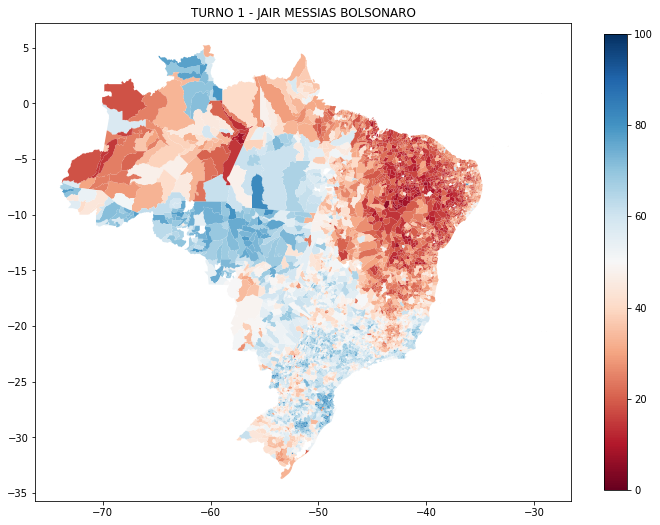

In [24]:
# normalizar coluna de valores cor divergente

norm = clrs.CenteredNorm(vcenter=50, halfrange=50)
ax = gdf.plot(gdf[f'perc_{candidat1}'], legend=True, figsize=(12,12), cmap='RdBu', legend_kwds={'shrink':0.7}, norm=norm)
ax.set_title(f'TURNO 1 - {candidat1}');


## Exportar geopackages

In [ ]:
# df votacao_secao
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'
df_secao = pd.read_csv(f_vot_secao, sep=sep, encoding=enc, decimal=dec)

# df primeiro turno
df_secao_1t = df_secao.query('NR_TURNO == 1')
df_pvt_1t = pd.pivot_table(df_secao_1t, index='NM_MUNICIPIO', values='QT_VOTOS', columns='NM_VOTAVEL', aggfunc=np.sum, fill_value=0).reset_index()

# df segundo turno
df_secao_2t = df_secao.query('NR_TURNO == 2')
df_pvt_2t = pd.pivot_table(df_secao_2t, index='NM_MUNICIPIO', values='QT_VOTOS', columns='NM_VOTAVEL', aggfunc=np.sum, fill_value=0).reset_index()

# renomear coluna para join
df_pvt_1t = df_pvt_1t.rename(columns={"NM_MUNICIPIO": "nome"})
df_pvt_2t = df_pvt_2t.rename(columns={"NM_MUNICIPIO": "nome"})

# geoDataFrame
gpkg_mun = './Brasil_Cartografia/mun250.gpkg'
gdf_mun250 = gpd.read_file(gpkg_mun)

# merge primeiro turno
gdf_mun250_1t = gdf_mun250.merge(df_pvt_1t, on='nome')

# merge segundo turno
gdf_mun250_2t = gdf_mun250.merge(df_pvt_2t, on='nome')

# export primeiro turno
gdf_mun250_1t.to_file("votacao_primeiro_turno.gpkg", layer='turno1', driver="GPKG")

# export segundo turno
gdf_mun250_2t.to_file("votacao_segundo_turno.gpkg", layer='turno2', driver="GPKG")

In [41]:
gdf_mun250_1t.to_file("votacao_primeiro_turno.gpkg", layer='turno1', driver="GPKG")

/home/guano/.local/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [40]:
df_pvt_1t[df_pvt_1t['NM_MUNICIPIO'].str.contains("D OESTE")]

NM_VOTAVEL,NM_MUNICIPIO,CIRO FERREIRA GOMES,JAIR MESSIAS BOLSONARO,JOSE MARIA EYMAEL,KELMON LUIS DA SILVA SOUZA,LEONARDO PÉRICLES VIEIRA ROQUE,LUIZ FELIPE CHAVES D AVILA,LUIZ INÁCIO LULA DA SILVA,SIMONE NASSAR TEBET,SOFIA PADUA MANZANO,SORAYA VIEIRA THRONICKE,VERA LUCIA PEREIRA DA SILVA SALGADO,VOTO BRANCO,VOTO NULO
100,ALTA FLORESTA D OESTE,190,9034,1,10,1,11,3976,377,4,113,1,142,224
231,APARECIDA D OESTE,37,1425,0,0,1,4,1345,92,0,4,0,44,76
1280,CONQUISTA D OESTE,26,1442,0,4,1,0,590,42,0,12,0,14,32
1481,DIAMANTE D OESTE,55,1066,0,2,0,12,1718,94,1,7,0,18,30
1644,ESTRELA D OESTE,81,3180,1,3,1,13,1649,281,1,21,0,146,165
1710,FIGUEIRÓPOLIS D OESTE,32,1512,0,11,1,2,493,49,0,16,0,22,39
1838,GLÓRIA D OESTE,23,1250,0,4,0,1,651,44,0,9,0,17,46
1926,GUARANI D OESTE,24,541,0,0,0,3,661,66,0,2,0,17,32
1985,HERVAL D OESTE,167,7838,1,14,4,74,4286,782,7,45,3,176,157
2277,ITAPEJARA D OESTE,109,3201,0,3,0,30,3728,168,2,14,1,91,100
